# **Data Profiling Notebook - China Air Quality Dataset**
### **Import libraries, create output folders and read the dataset**

In [42]:
import os

import pandas as pd
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from sklearn.preprocessing import LabelEncoder
from seaborn import distplot, heatmap
from matplotlib.pyplot import figure, savefig, show, subplots, Axes, title
from utils.ds_charts import bar_chart, get_variable_types, choose_grid, multiple_bar_chart, multiple_line_chart, HEIGHT

DATA_FILE = "data/original_tabular.csv"
IMAGES_FOLDER = "images/"
DIMENSIONALITY_FOLDER = IMAGES_FOLDER + "dimensionality/"
DISTRIBUTION_FOLDER = IMAGES_FOLDER + "distribution/"
GRANULARITY_FOLDER = IMAGES_FOLDER + "granularity/"
SPARCITY_FOLDER = IMAGES_FOLDER + "sparcity/"

if not os.path.exists(DIMENSIONALITY_FOLDER):
    os.makedirs(DIMENSIONALITY_FOLDER)
if not os.path.exists(DISTRIBUTION_FOLDER):
    os.makedirs(DISTRIBUTION_FOLDER)
if not os.path.exists(GRANULARITY_FOLDER):
    os.makedirs(GRANULARITY_FOLDER)
if not os.path.exists(SPARCITY_FOLDER):
    os.makedirs(SPARCITY_FOLDER)

df = pd.read_csv(DATA_FILE, parse_dates=["date"])

# We guessed that "Field_1" was the Air Quality Index value
df.rename(columns={'Field_1': 'AQI'}, inplace=True)

# Data cleaning on GbCity
df.loc[df["GbCity"] == "s", "GbCity"] = pd.NA
df['GbCity'] = df["GbCity"].astype(str)

### **Remove unnecessary ID columns**

In [43]:
df.drop(['FID'], axis=1, inplace=True)
df

date       City_EN   Prov_EN  GbCity  GbProv    AQI   ALARM  \
0      2020-01-01       Beijing   Beijing    1100      11   24.0    Safe   
1      2020-01-01       Tianjin   Tianjin    1200      12  245.0    Safe   
2      2020-01-01  Shijiazhuang     Hebei    1301      13  228.0    Safe   
3      2020-01-01      Tangshan     Hebei    1302      13  244.0    Safe   
4      2020-01-01   Qinhuangdao     Hebei    1303      13  201.0    Safe   
...           ...           ...       ...     ...     ...    ...     ...   
169268 2021-03-24          Puer    Yunnan  530800      53    NaN    Safe   
169269 2021-03-24      Zhongwei   Ningxia  640500      64    NaN  Danger   
169270 2021-03-24        Kuerle  Xinjiang  652801      65    NaN    Safe   
169271 2021-03-24       Shihezi  Xinjiang  659001      65    NaN  Danger   
169272 2021-03-24       Wujiaqu  Xinjiang  659004      65    NaN  Danger   

         CO_Mean  CO_Min  CO_Max  ...  PM2.5_Max  PM2.5_Std   PM10_Mean  \
0       0.792917    0.60    1.09  ...       48.0   7.618394   55.000000   
1       1.157083    0.71    1.46  ...       78.0  12.203995   94.500000   
2       1.489167    1.17    1.94  ...       95.0  13.515423  135.166667   
3       1.882083    1.10    4.22  ...      104.0  18.350324  133.458333   
4       1.389583    0.78    2.14  ...       64.0   9.945686   74.416667   
...          ...     ...     ...  ...        ...        ...         ...   
169268  0.575000    0.40    0.90  ...       48.0  13.438065   45.666667   
169269  0.389583    0.15    0.90  ...       73.0  11.246913  155.375000   
169270       NaN     NaN     NaN  ...        NaN        NaN         NaN   
169271  0.639583    0.40    0.90  ...       56.0  18.743703  154.083333   
169272  0.797917    0.40    1.20  ...       63.0  14.898732  223.791667   

        PM10_Min  PM10_Max    PM10_Std   SO2_Mean  SO2_Min  SO2_Max    SO2_Std  
0           38.0      86.0   14.044572   6.708333      3.0     12.0   2.440614  
1           64.0     123.0   17.327723  14.208333      9.0     20.0   3.054766  
2          114.0     168.0   15.249772  26.208333     22.0     33.0   2.676739  
3           91.0     192.0   30.202068  35.208333     17.0     91.0  18.009209  
4           51.0     123.0   18.511070  25.416667     15.0     44.0   5.596998  
...          ...       ...         ...        ...      ...      ...        ...  
169268       6.0      87.0   27.025708   4.250000      3.0     20.0   3.319764  
169269     118.0     241.0   36.133794  11.375000      5.0     23.0   5.368213  
169270       NaN       NaN         NaN        NaN      NaN      NaN        NaN  
169271      34.0     323.0   97.537137   7.208333      5.0     11.0   1.471370  
169272      34.0     380.0  104.250891   7.416667      6.0     15.0   1.998263  

[169273 rows x 31 columns]

## **Data Dimensionality**

### Number of records versus number of variables

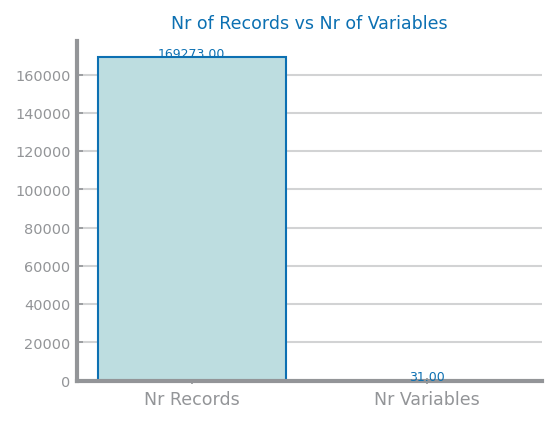

In [44]:
values = {'Nr Records': df.shape[0], 'Nr Variables': df.shape[1]}
bar_chart(list(values.keys()), list(values.values()), title='Nr of Records vs Nr of Variables')

savefig(DIMENSIONALITY_FOLDER + '/records_vs_variables.png')

show()

### Initial category of each feature

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169273 entries, 0 to 169272
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        169273 non-null  datetime64[ns]
 1   City_EN     169273 non-null  object        
 2   Prov_EN     169273 non-null  object        
 3   GbCity      169273 non-null  object        
 4   GbProv      169273 non-null  int64         
 5   AQI         152211 non-null  float64       
 6   ALARM       169273 non-null  object        
 7   CO_Mean     161495 non-null  float64       
 8   CO_Min      161495 non-null  float64       
 9   CO_Max      161496 non-null  float64       
 10  CO_Std      161495 non-null  float64       
 11  NO2_Mean    161571 non-null  float64       
 12  NO2_Min     161571 non-null  float64       
 13  NO2_Max     161572 non-null  float64       
 14  NO2_Std     161571 non-null  float64       
 15  O3_Mean     161528 non-null  float64       
 16  O3

### Normalized category of each feature

In [46]:
cat_vars = df.select_dtypes(include='object')
df[cat_vars.columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169273 entries, 0 to 169272
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        169273 non-null  datetime64[ns]
 1   City_EN     169273 non-null  category      
 2   Prov_EN     169273 non-null  category      
 3   GbCity      169273 non-null  category      
 4   GbProv      169273 non-null  int64         
 5   AQI         152211 non-null  float64       
 6   ALARM       169273 non-null  category      
 7   CO_Mean     161495 non-null  float64       
 8   CO_Min      161495 non-null  float64       
 9   CO_Max      161496 non-null  float64       
 10  CO_Std      161495 non-null  float64       
 11  NO2_Mean    161571 non-null  float64       
 12  NO2_Min     161571 non-null  float64       
 13  NO2_Max     161572 non-null  float64       
 14  NO2_Std     161571 non-null  float64       
 15  O3_Mean     161528 non-null  float64       
 16  O3

### Number of variables for each category

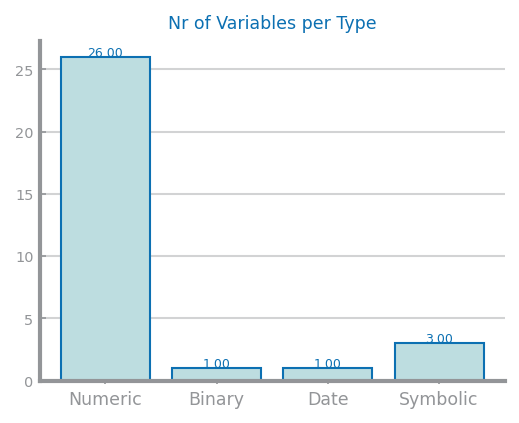

In [47]:
variable_types = get_variable_types(df)

counts = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])
bar_chart(list(counts.keys()), list(counts.values()), title='Nr of Variables per Type')

savefig(DIMENSIONALITY_FOLDER + '/variable_per_types.png')

show()

### Number of missing values for each feature (only those with missing values are included)

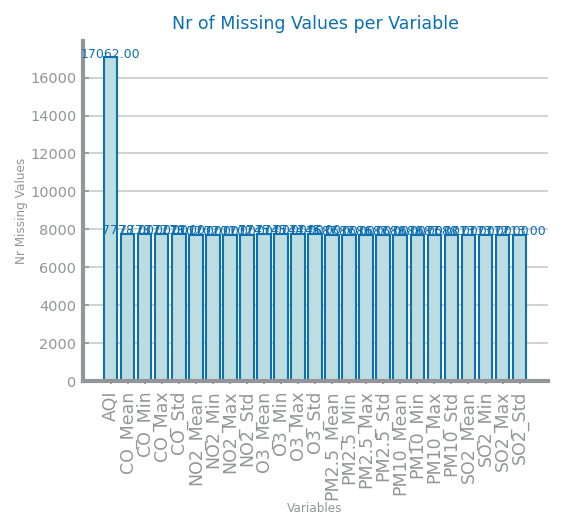

In [48]:
mv = {}
for var in df:
    nr = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr
bar_chart(list(mv.keys()), list(mv.values()), title='Nr of Missing Values per Variable',
            xlabel='Variables', ylabel='Nr Missing Values', rotation=True)

savefig(DIMENSIONALITY_FOLDER + '/missing_values_per_var.png')

show()

### Number of unique values for each feature

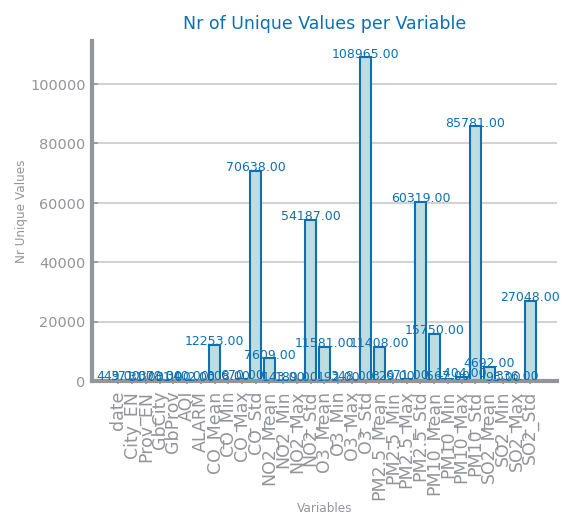

In [49]:
mv = {}
for var in df:
    nr = len(df[var].unique())
    if nr > 0:
        mv[var] = nr
bar_chart(list(mv.keys()), list(mv.values()), title='Nr of Unique Values per Variable',
            xlabel='Variables', ylabel='Nr Unique Values', rotation=True)

savefig(DIMENSIONALITY_FOLDER + '/unique_values_per_var.png')

show()

## **Data Distribution**

### Numeric variables summary

In [50]:
df.describe()

GbProv            AQI        CO_Mean         CO_Min  \
count  169273.000000  152211.000000  161495.000000  161495.000000   
mean       39.986737     170.000000       0.752409       0.529502   
std        14.543213      97.860766       0.369792       0.246906   
min        11.000000       1.000000       0.100000       0.100000   
25%        32.000000      85.000000       0.529091       0.380000   
50%        41.000000     170.000000       0.680000       0.500000   
75%        51.000000     255.000000       0.879167       0.630000   
max        65.000000     339.000000      30.190476       3.670000   

              CO_Max         CO_Std       NO2_Mean        NO2_Min  \
count  161496.000000  161495.000000  161571.000000  161571.000000   
mean        1.123513       0.166635      25.703035      13.071421   
std         0.749282       0.206313      14.863372       9.717393   
min         0.100000       0.000000       1.458333       1.000000   
25%         0.710000       0.070739      14.666667       7.000000   
50%         0.950000       0.115361      22.291667      10.000000   
75%         1.300000       0.197949      33.541667      16.000000   
max        90.000000      42.291859     149.458333     122.000000   

             NO2_Max        NO2_Std  ...      PM2.5_Max      PM2.5_Std  \
count  161572.000000  161571.000000  ...  161587.000000  161586.000000   
mean       44.959455       9.266639  ...      58.511675      10.978986   
std        23.754584       5.873404  ...      65.257636      15.457100   
min         2.000000       0.000000  ...       1.000000       0.000000   
25%        26.000000       4.721221  ...      28.000000       4.669642   
50%        41.000000       7.994681  ...      44.000000       7.642966   
75%        60.000000      12.635928  ...      71.000000      12.875917   
max       382.000000      89.896545  ...    5598.000000    1661.806341   

           PM10_Mean       PM10_Min       PM10_Max       PM10_Std  \
count  161585.000000  161585.000000  161586.000000  161585.000000   
mean       64.945750      37.643447     108.238486      20.043643   
std        78.707306      43.968002     163.648863      43.486010   
min         1.666667       1.000000       3.000000       0.000000   
25%        31.583333      15.000000      52.000000       8.336562   
50%        50.458333      28.000000      81.000000      13.336198   
75%        79.291667      48.000000     125.000000      21.604880   
max      6593.125000    3447.000000    9985.000000    4261.526598   

            SO2_Mean        SO2_Min        SO2_Max        SO2_Std  
count  161560.000000  161560.000000  161561.000000  161560.000000  
mean       10.468316       6.388020      20.019479       3.657845  
std         7.587371       3.584805      22.740546       5.513771  
min         1.000000       1.000000       1.000000       0.000000  
25%         6.000000       4.000000       8.000000       0.877971  
50%         8.375000       6.000000      13.000000       1.914401  
75%        12.375000       8.000000      23.000000       4.183093  
max       142.500000      93.000000     791.000000     211.468411  

[8 rows x 26 columns]

### Global numeric variable distribution boxplot

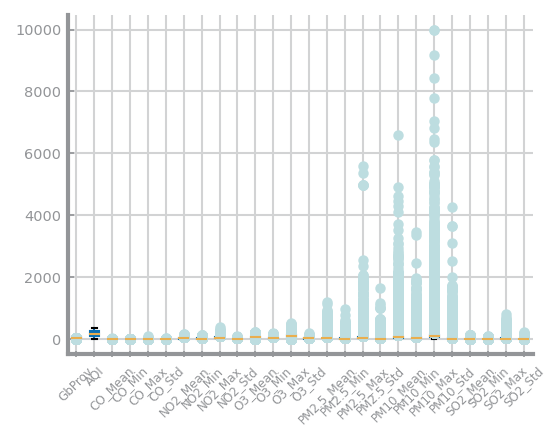

In [51]:
df.boxplot(rot=45)

savefig(DISTRIBUTION_FOLDER + "/global_var_boxplot.png")

show()

### Single numeric variable distribution boxplot

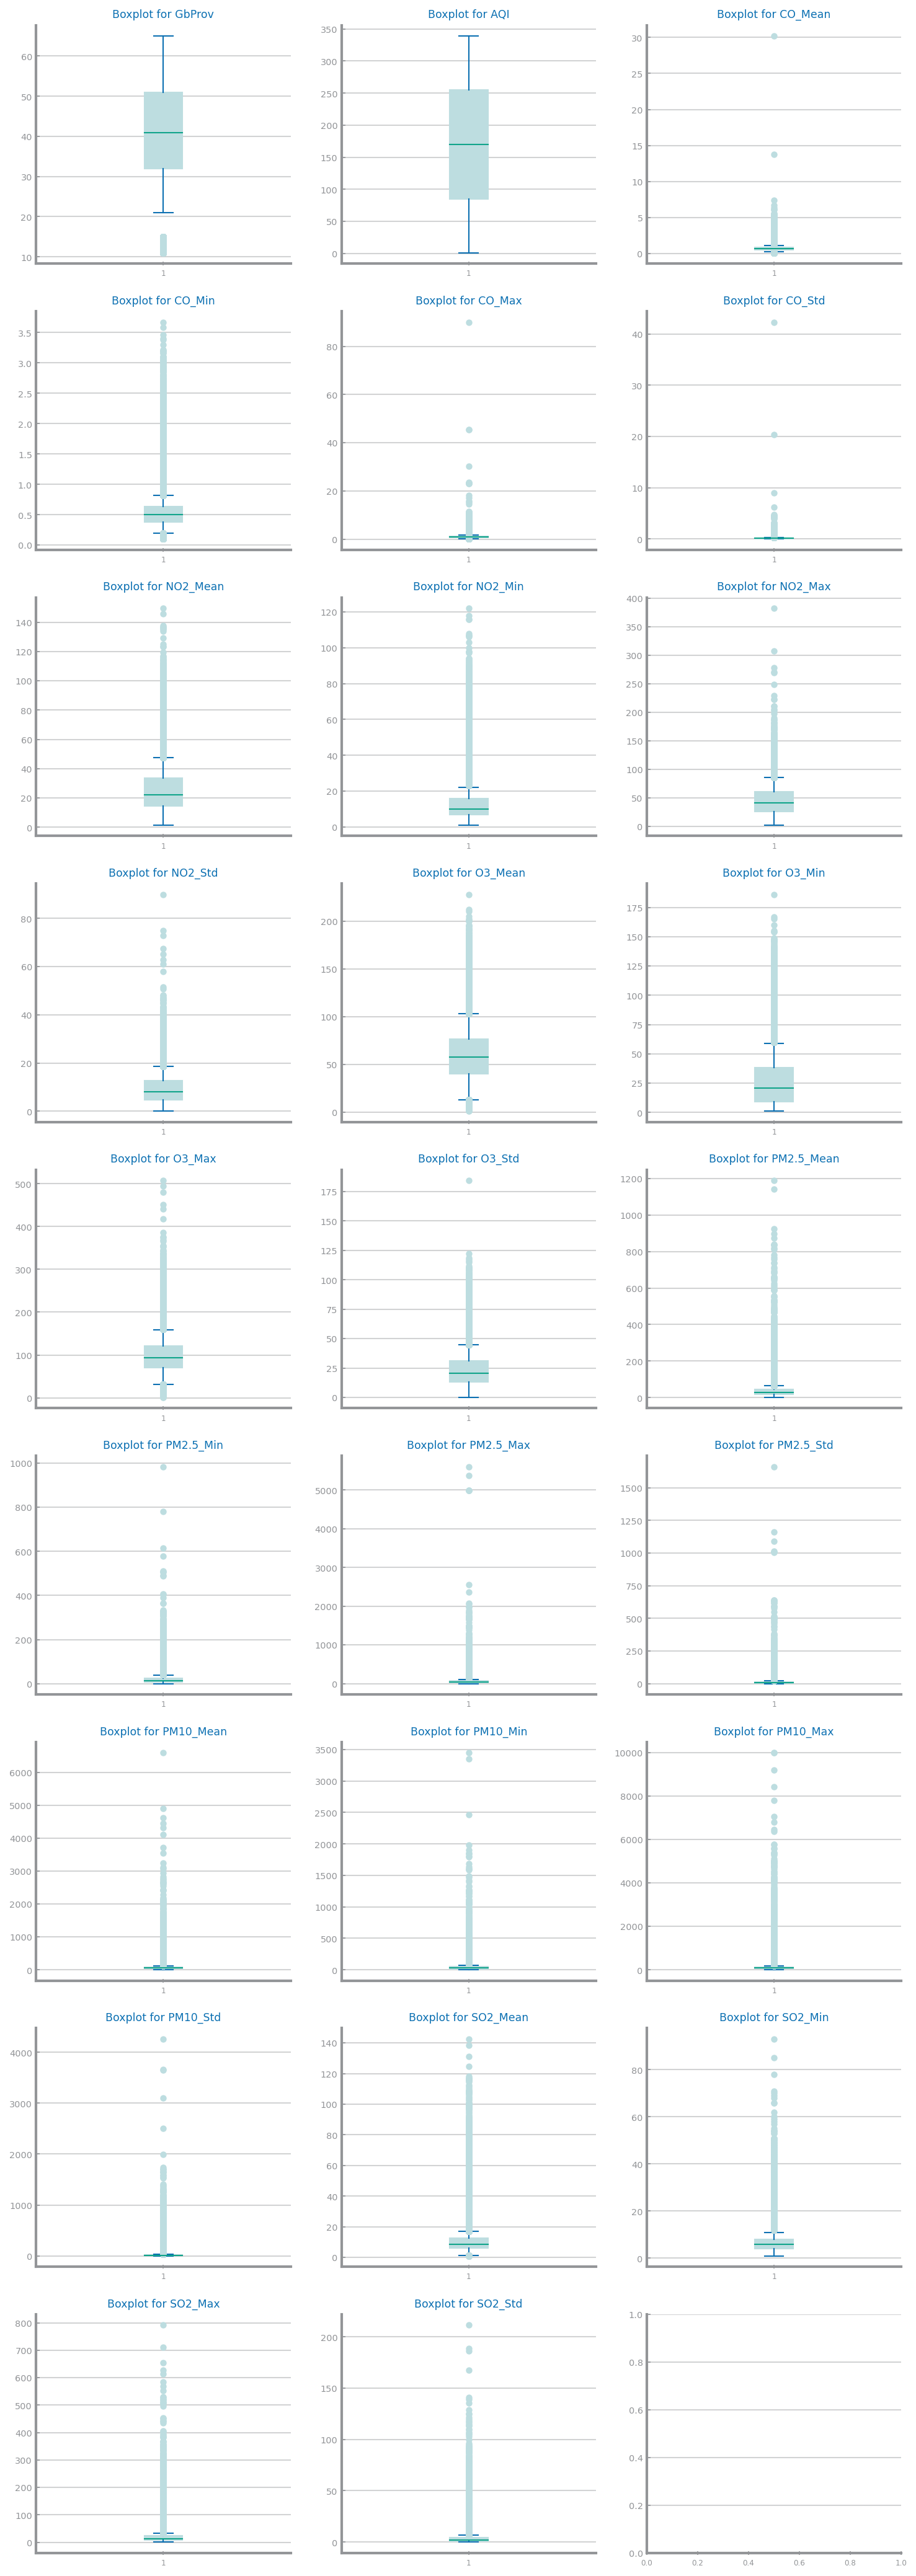

In [52]:
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = choose_grid(len(numeric_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(df[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/single_var_boxplots.png")

show()

### Number of outliers per variable using the IQR process and the STD process

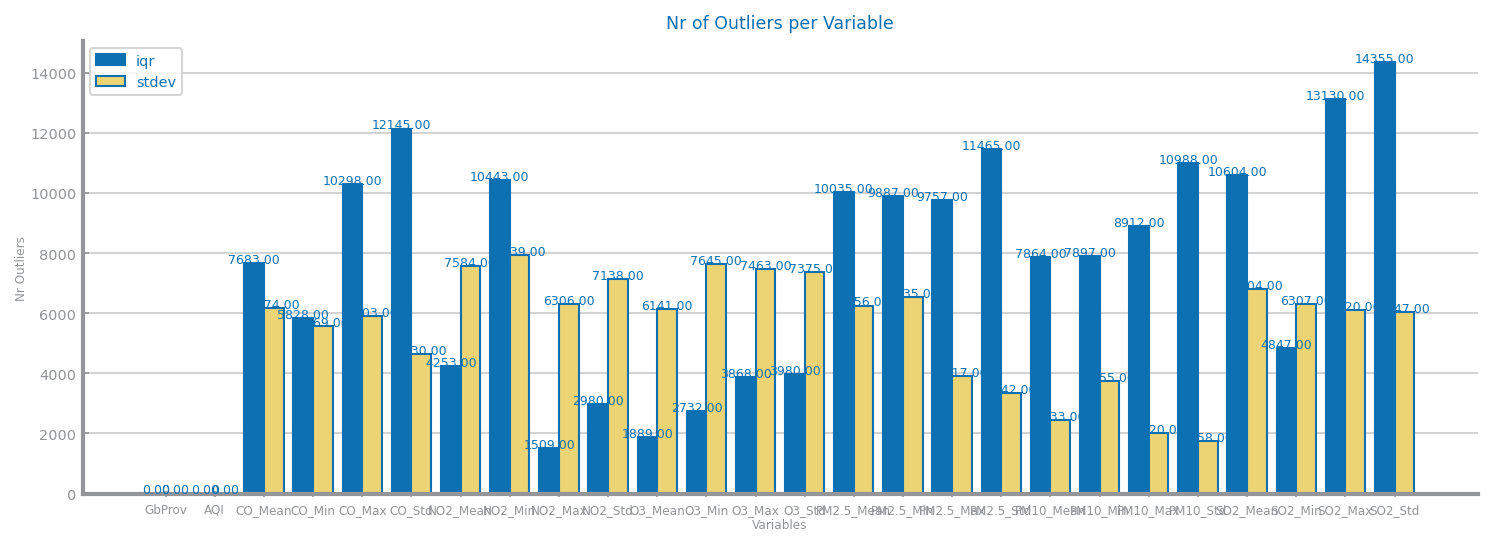

In [53]:
NR_STDDEV: int = 2
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
outliers_iqr = []
outliers_stdev = []
summary5 = df.describe(include='number')
for var in numeric_vars:
    iqr = 1.5 * (summary5[var]['75%'] - summary5[var]['25%'])
    outliers_iqr += [
        df[df[var] > summary5[var]['75%']  + iqr].count()[var] +
        df[df[var] < summary5[var]['25%']  - iqr].count()[var]]
    std = NR_STDDEV * summary5[var]['std']
    outliers_stdev += [
        df[df[var] > summary5[var]['mean'] + std].count()[var] +
        df[df[var] < summary5[var]['mean'] - std].count()[var]]
outliers = {'iqr': outliers_iqr, 'stdev': outliers_stdev}
figure(figsize=(12, HEIGHT))
multiple_bar_chart(numeric_vars, outliers, title='Nr of Outliers per Variable', xlabel='Variables', ylabel='Nr Outliers', percentage=False)

savefig(DISTRIBUTION_FOLDER + "/outliers_per_variable.png")

show()

### Basic variable distribution

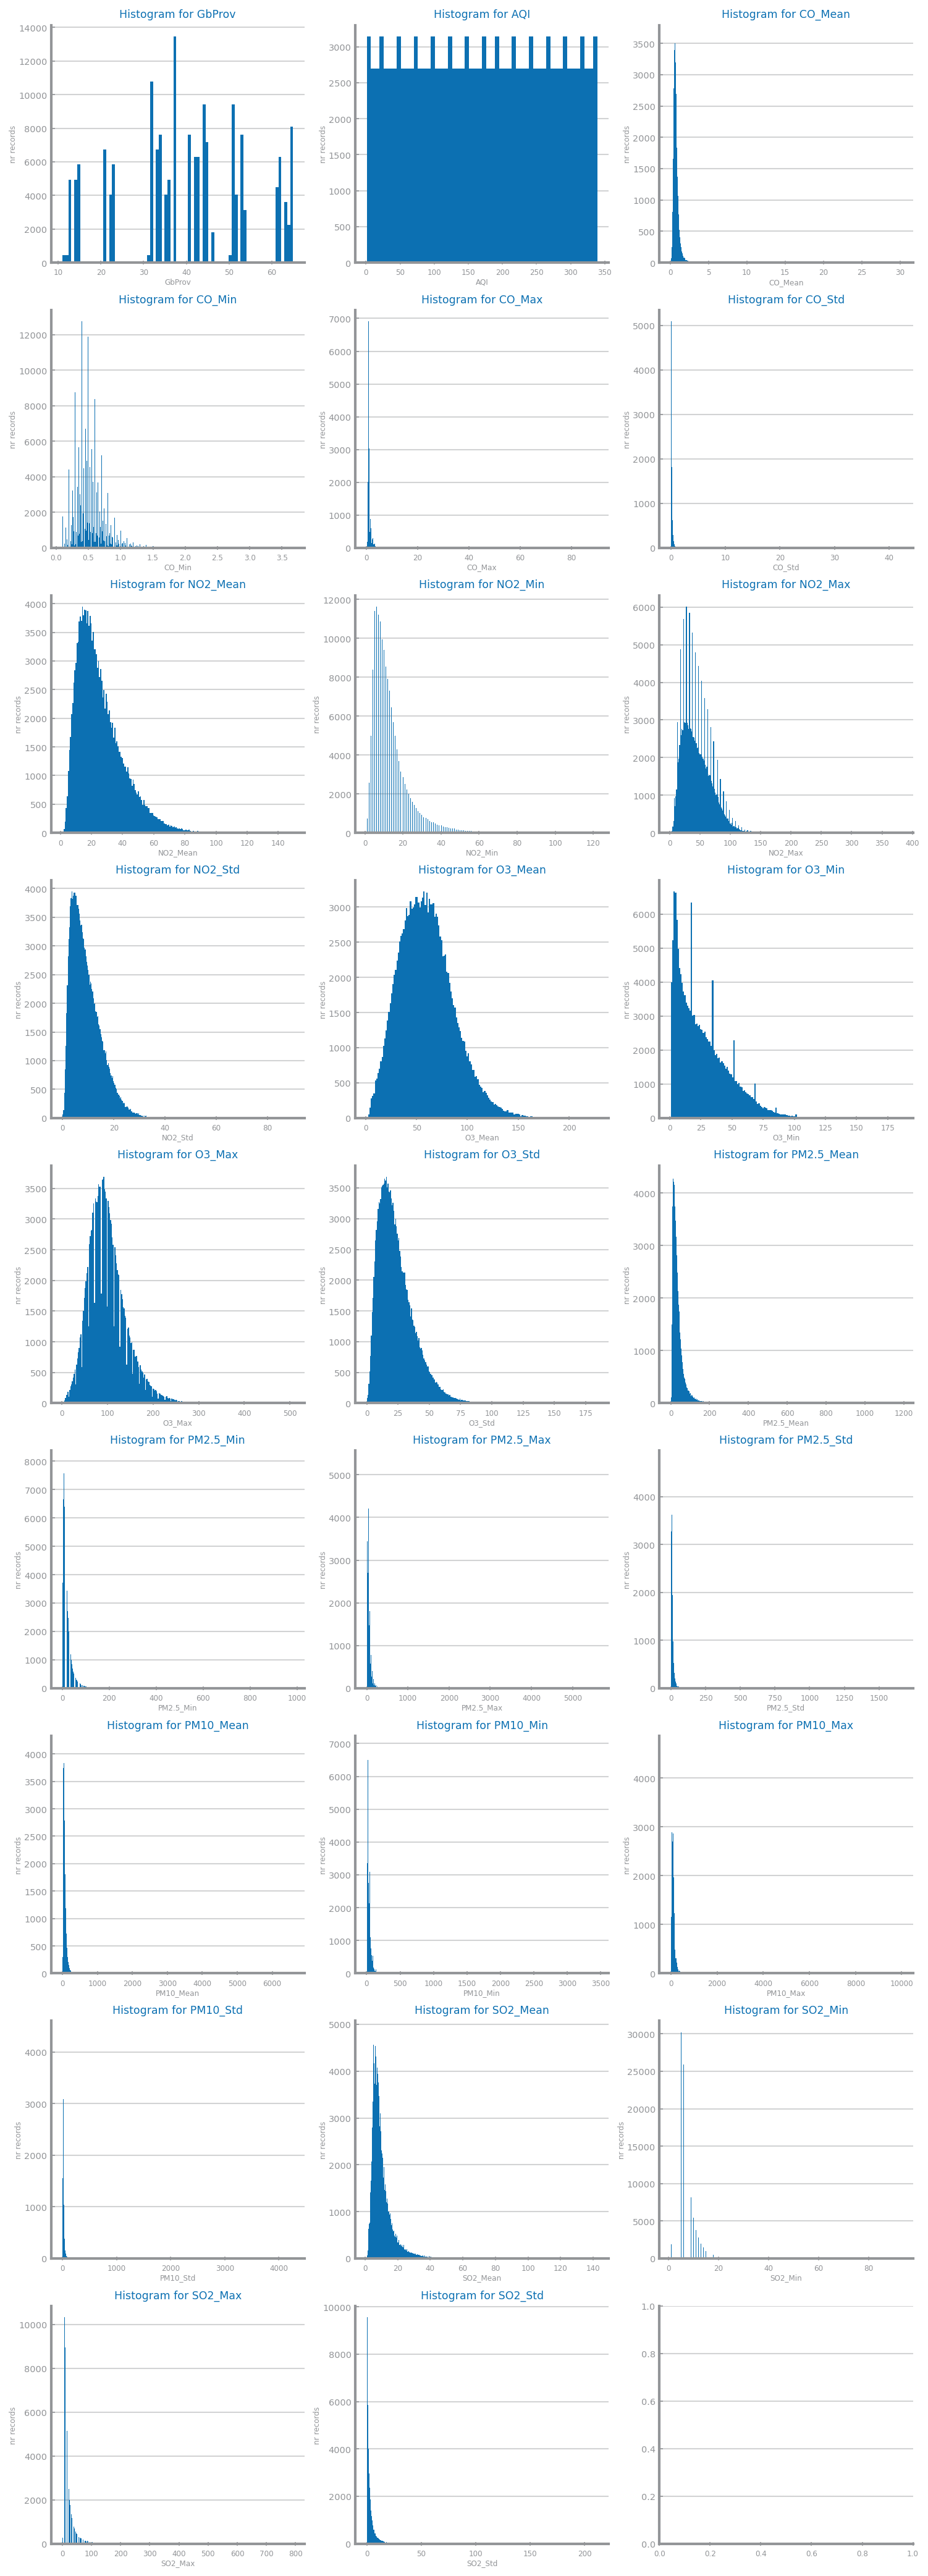

In [54]:
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(df[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/numeric_distribution_histogram.png")

show()

### Advanced variable distribution

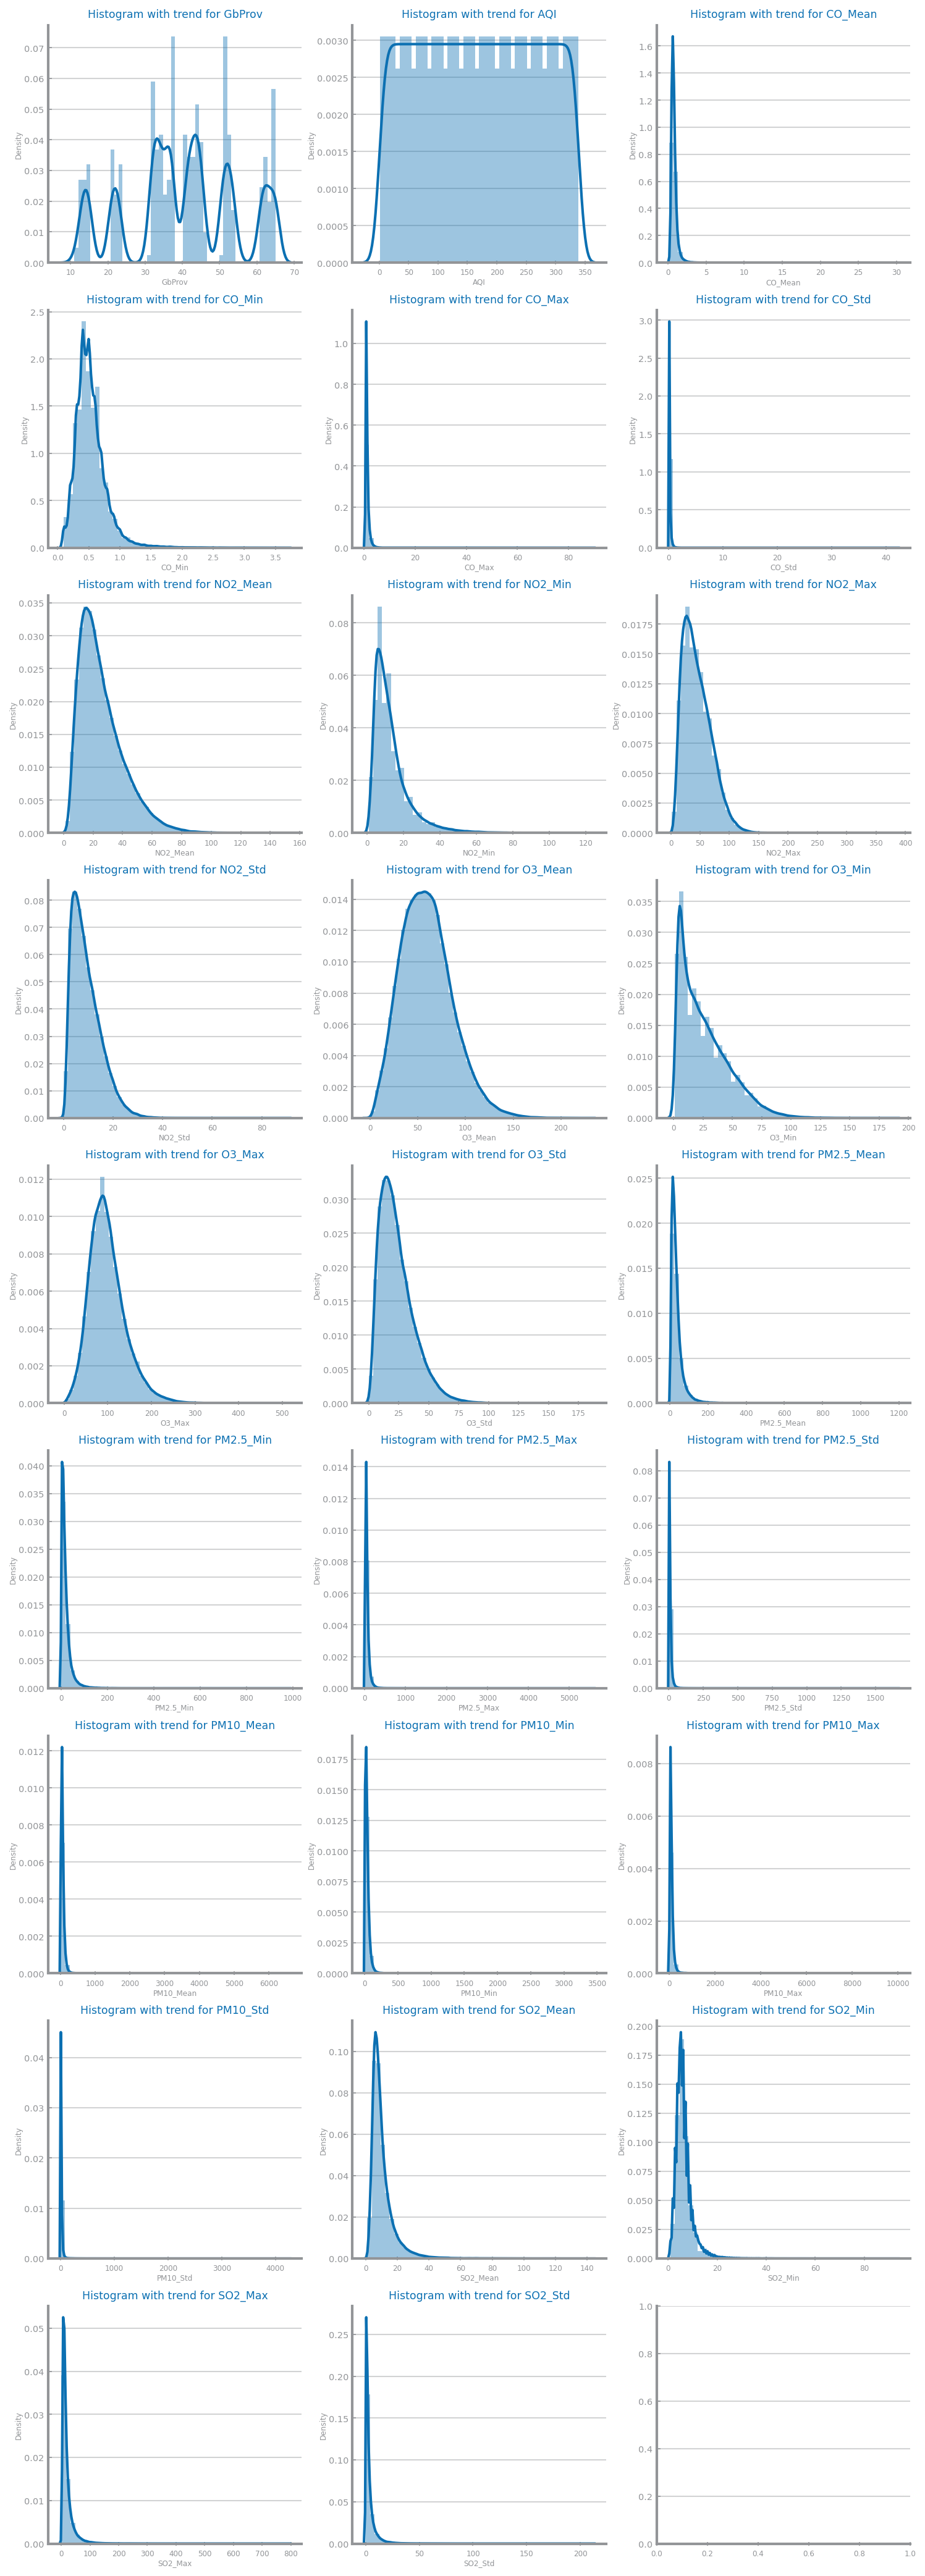

In [55]:
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    distplot(df[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/numeric_distribution_histogram_trend.png")

show()

### Normal, exponential and logarithmic distributions

In [16]:
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(log(scale),sigma)] = lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    distributions = compute_known_distributions(values)
    multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

numeric_vars = get_variable_types(df)['Numeric']

rows, cols = choose_grid(len(numeric_vars))

if not numeric_vars:
    raise ValueError('There are no numeric variables.')
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], df[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/numeric_normal_exp_log_distribution.png")

show()

KeyboardInterrupt: 

### Symbolic variables

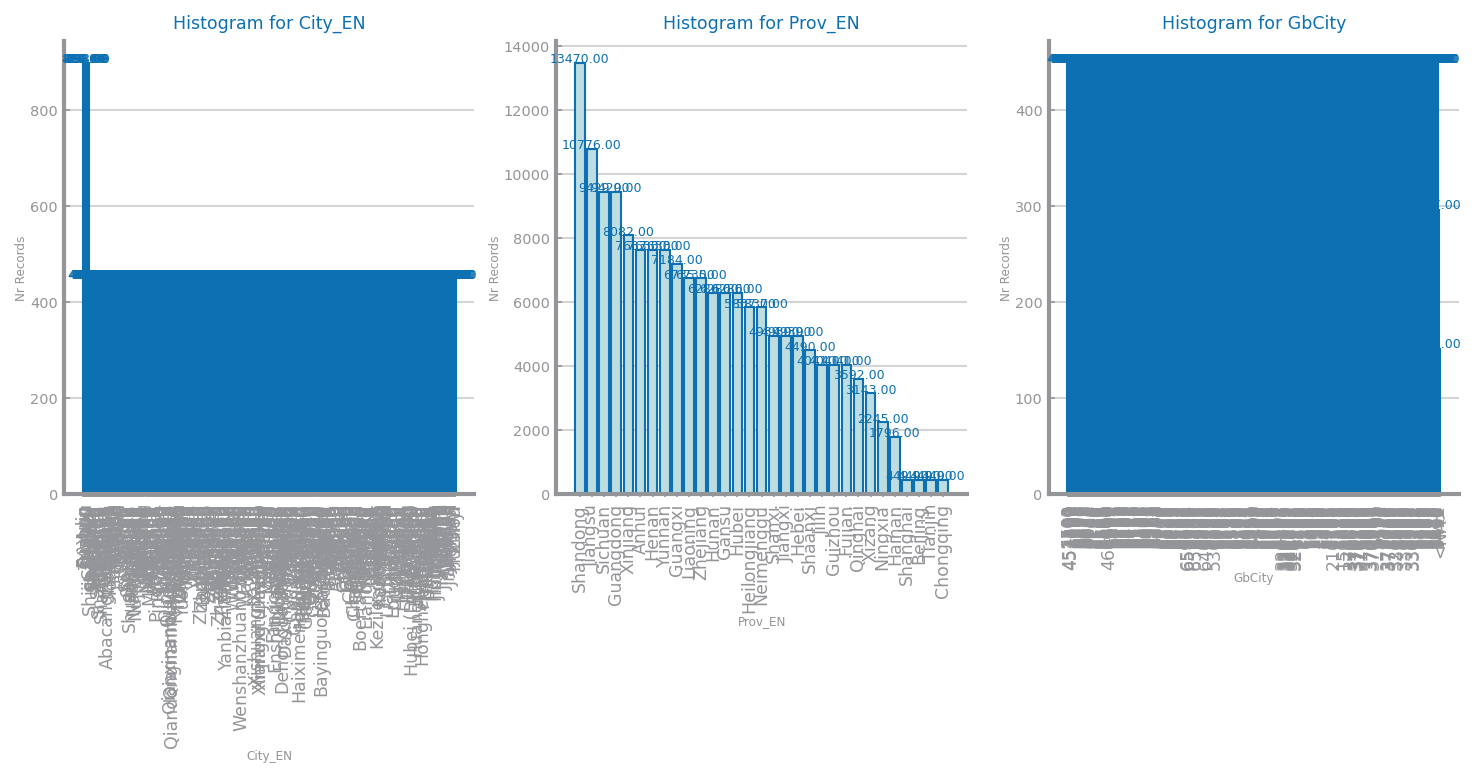

In [56]:
symbolic_vars = get_variable_types(df)['Symbolic']
if not symbolic_vars:
    raise ValueError('There are no symbolic variables.')

rows, cols = choose_grid(len(symbolic_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False, constrained_layout=False)

i, j = 0, 0
for n in range(len(symbolic_vars)):
    counts = df[symbolic_vars[n]].value_counts()
    bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n], xlabel=symbolic_vars[n], ylabel='Nr Records', percentage=False, rotation=True)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/symbolic_distribution_histrogram.png")

show() 

### Date variables

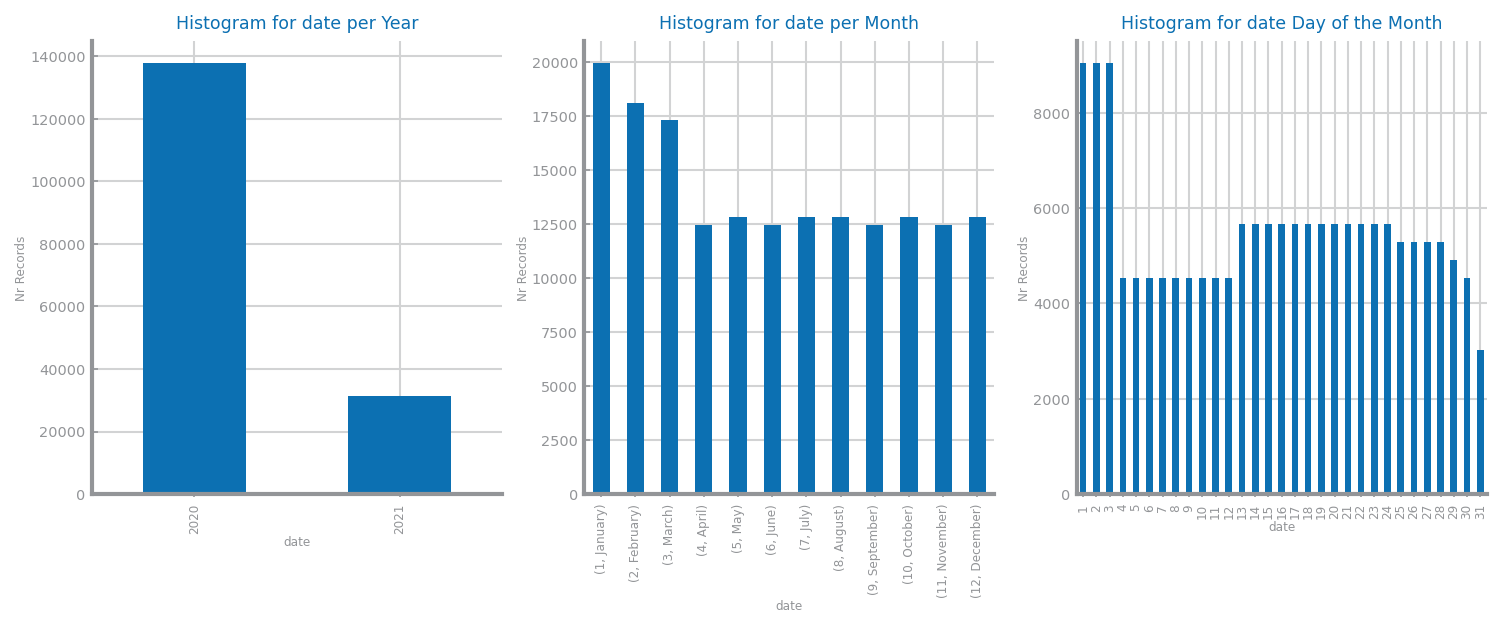

In [59]:
date_vars = get_variable_types(df)['Date']
if not date_vars:
    raise ValueError('There are no date variables.')

rows, cols = len(date_vars), 3
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False, constrained_layout=False)

for i, var in enumerate(date_vars):
    df[var].groupby(df[var].dt.year).count().plot(ax=axs[0, 0], kind="bar", title='Histogram for %s per Year'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    df[var].groupby([df[var].dt.month, df[var].dt.month_name()]).count().plot(ax=axs[0, 1], kind="bar", title='Histogram for %s per Month'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    df[var].groupby(df[var].dt.day).count().plot(ax=axs[0, 2], kind="bar", title='Histogram for %s Day of the Month'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    
savefig(DISTRIBUTION_FOLDER + "/date_distribution_histrogram.png")

show()

## **Data Granularity**

### Numeric features

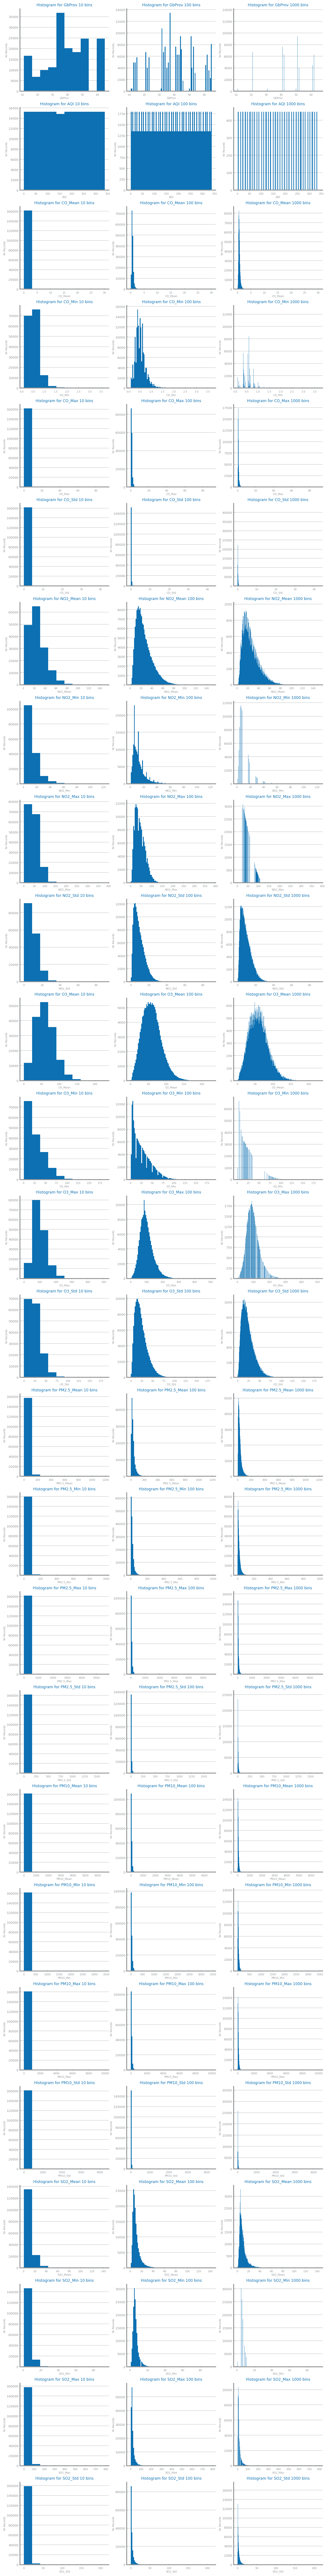

In [60]:
variables = get_variable_types(df)['Numeric']
if not variables:
    raise ValueError('There are no numeric variables.')
rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins' % (variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr Records')
        axs[i, j].hist(df[variables[i]].values, bins=bins[j])

savefig(GRANULARITY_FOLDER + "/numeric_granularity_histogram.png")

show()

### Symbolic features

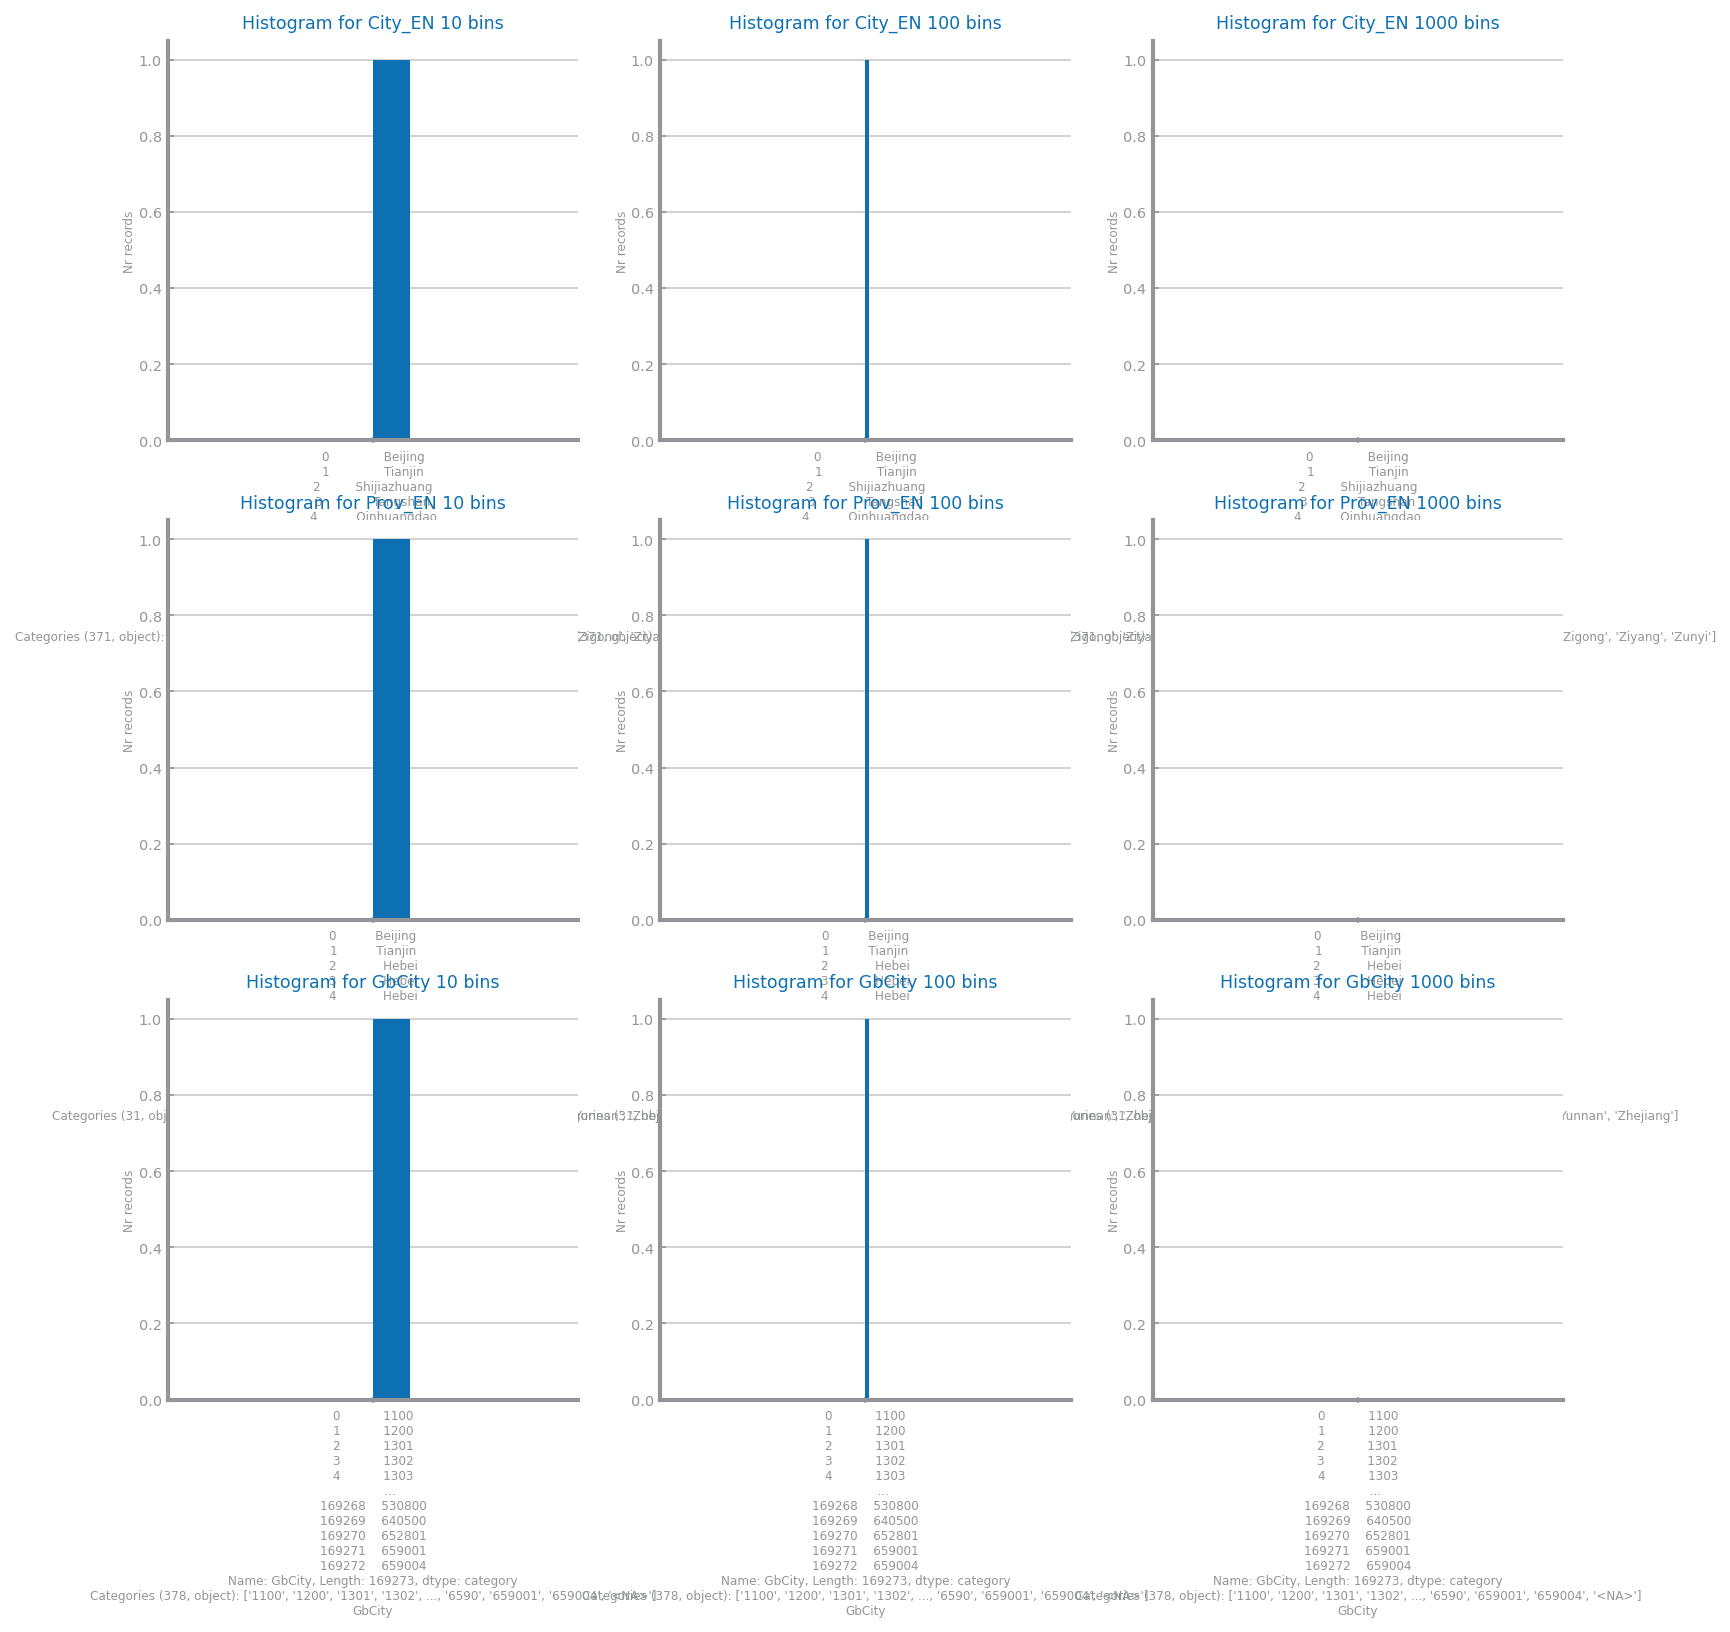

In [61]:
variables = get_variable_types(df)['Symbolic']

if not variables:
	raise ValueError('There are no symbolic variables.')
rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins' % (variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(str(df[variables[i]]), bins=bins[j])

savefig(GRANULARITY_FOLDER + "/symbolic_granularity_histogram.png")

show()

### Date features

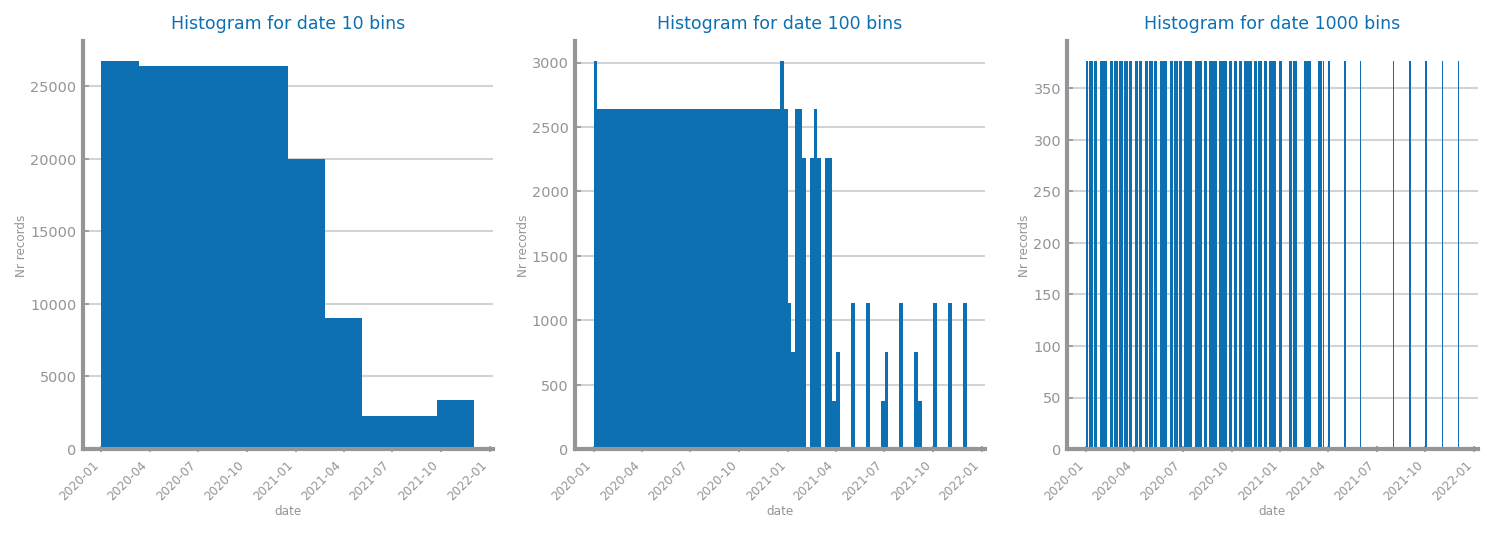

In [62]:
variables = get_variable_types(df)['Date']
if not variables:
    raise ValueError('There are no date variables.')
rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False, constrained_layout=True)

fig.autofmt_xdate(rotation=45)

for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins' % (variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(df[variables[i]].values, bins=bins[j])
        
savefig(GRANULARITY_FOLDER + "/date_granularity_histogram.png")

show()

## **Data Sparcity**

### Scatter-plots for numeric values

['GbProv', 'AQI', 'CO_Mean', 'CO_Min', 'CO_Max', 'CO_Std', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
['ALARM']
26 1


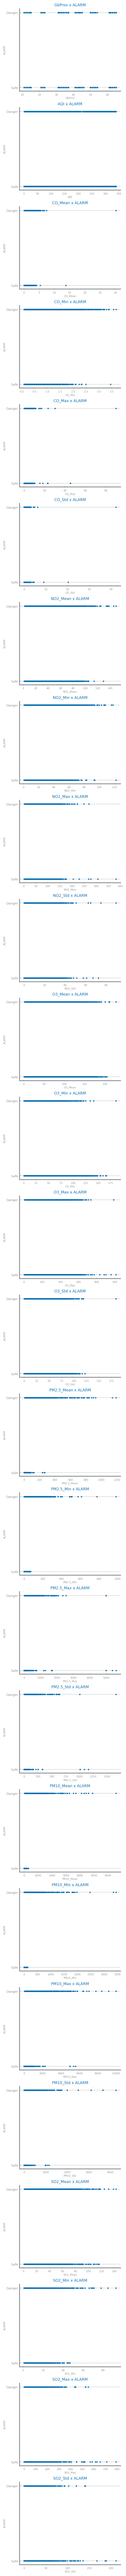

In [67]:
numeric_vars = get_variable_types(df)['Numeric']

target_class = get_variable_types(df)['Binary']

if not numeric_vars:
    raise ValueError('There are no numeric variables.')

if not target_class:
    raise ValueError('There are no binary variables.')


rows, cols = len(numeric_vars), len(target_class)

fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(rows):
    var1 = numeric_vars[i]
    for j in range(cols):
        var2 = target_class[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(df[var1], df[var2])

savefig(SPARCITY_FOLDER + "/numeric_sparcity_vs_target_values.png")

show()

### Scatter-plots for symbolic values

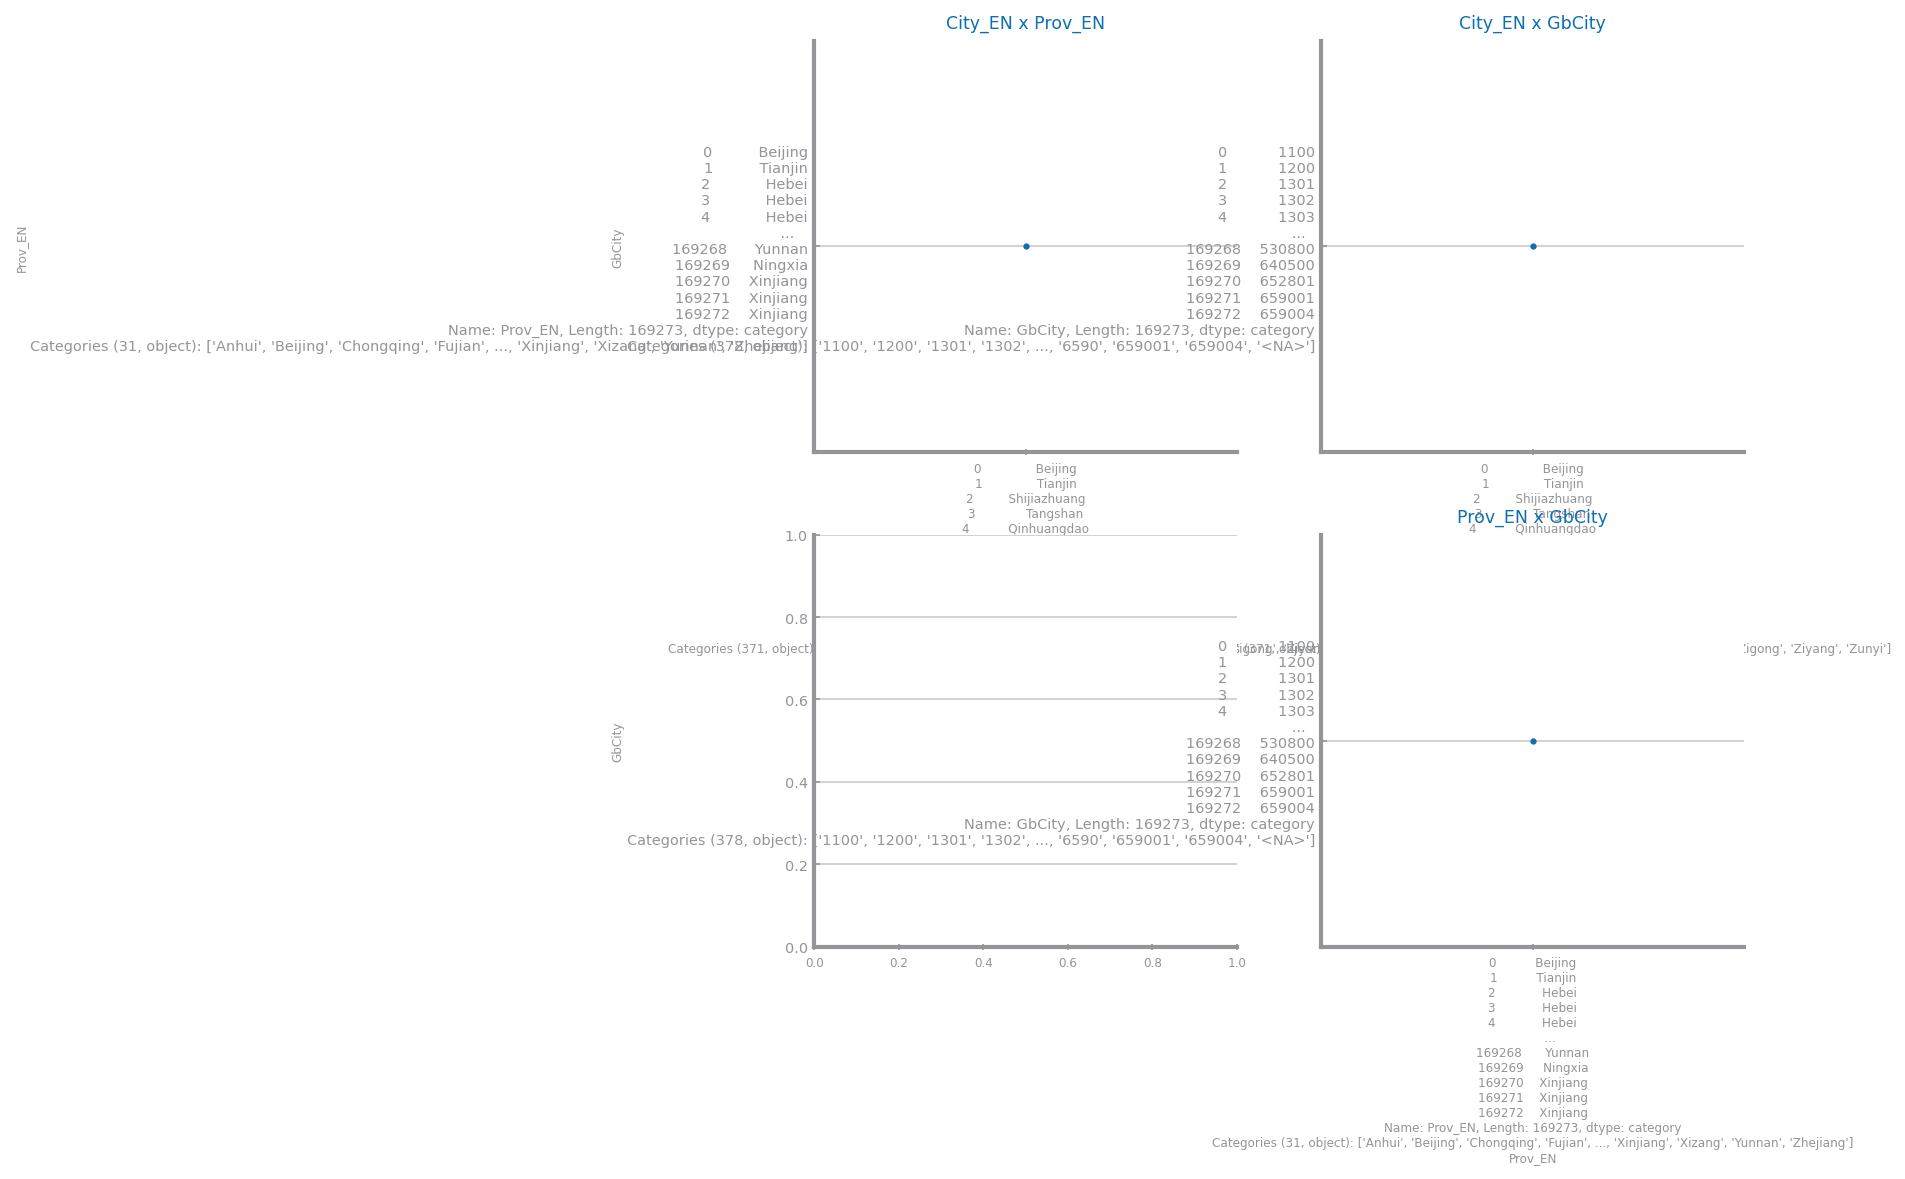

In [68]:
symbolic_vars = get_variable_types(df)['Symbolic']
if not symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars)-1, len(symbolic_vars)-1
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(symbolic_vars)):
    var1 = symbolic_vars[i]
    for j in range(i+1, len(symbolic_vars)):
        var2 = symbolic_vars[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(str(df[var1]), str(df[var2]))

savefig(SPARCITY_FOLDER + "/symbolic_sparcity_values.png")

show()

### Scatterplots vs class for symbolic values

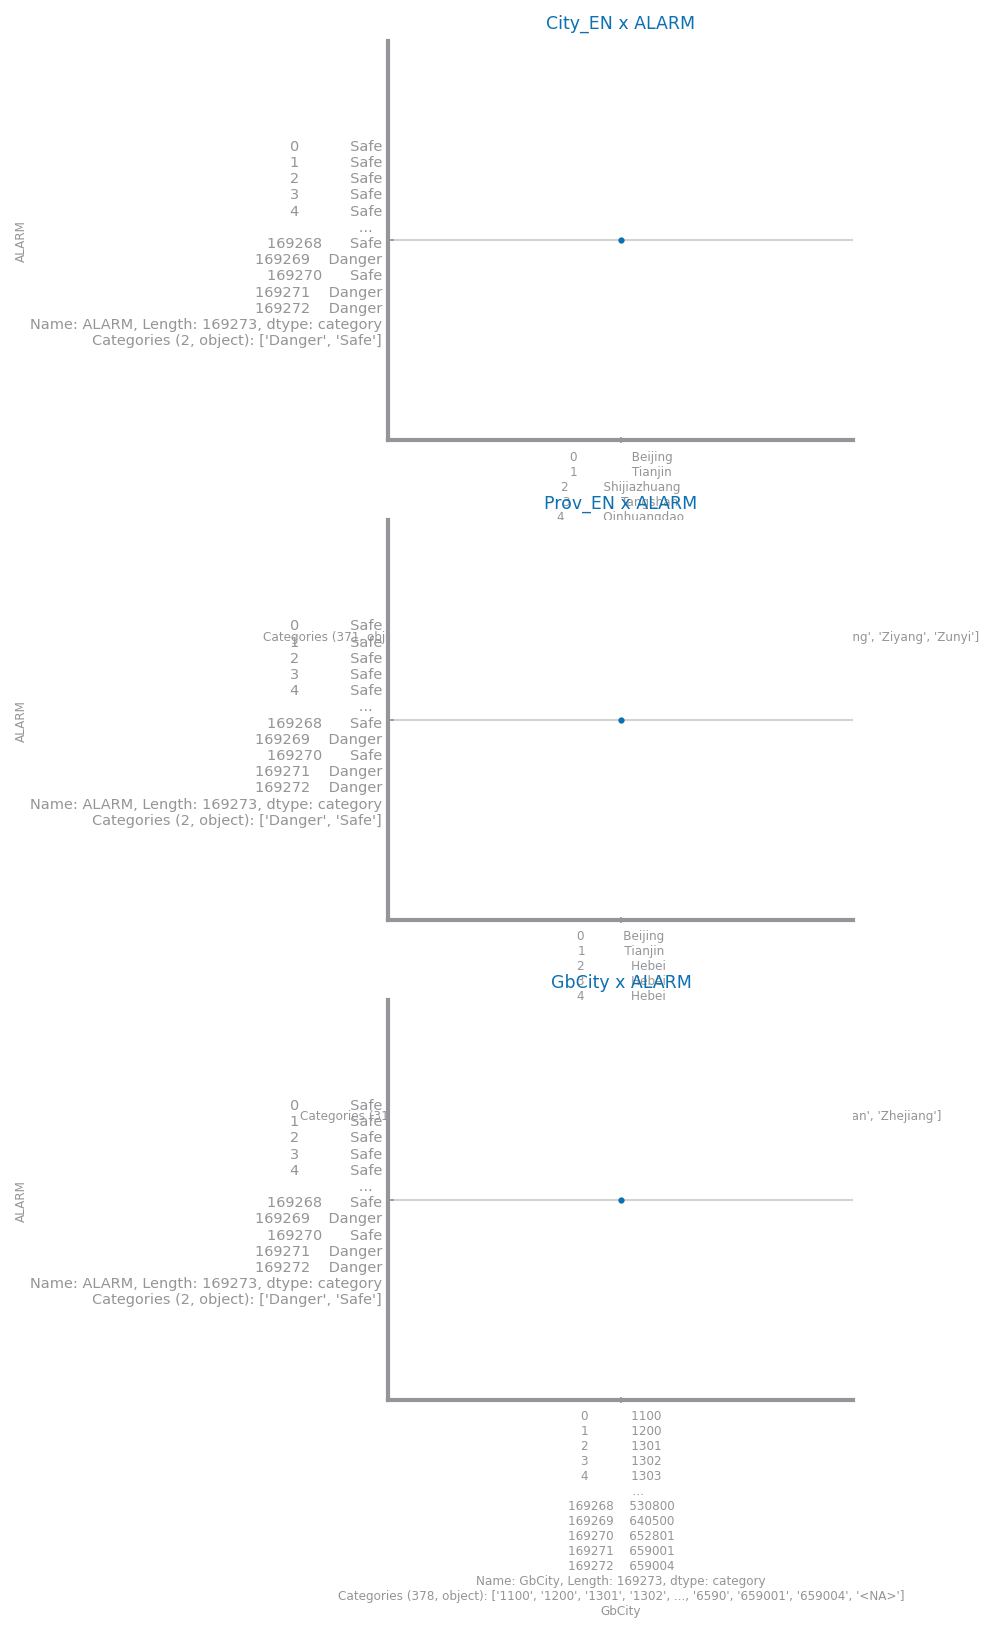

In [69]:
target_class = get_variable_types(df)['Binary']

symbolic_vars = get_variable_types(df)['Symbolic']
if not symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars), len(target_class)
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        var1 = symbolic_vars[i]
        var2 = target_class[j]
        axs[i, j].set_title("%s x %s"%(var1,var2))
        axs[i, j].set_xlabel(var1)
        axs[i, j].set_ylabel(var2)
    axs[i, 0].scatter(str(df[var1]), str(df[var2]))

savefig(SPARCITY_FOLDER + "/symbolic_sparcity_vs_target_values.png")

show()

### Correlation analysis for numeric variables

In [70]:
symbolic_and_target_vars = get_variable_types(df)['Symbolic'] + get_variable_types(df)['Binary']
if not symbolic_and_target_vars:
    raise ValueError('There are no symbolic variables.')

# Transform categorical data into numerical
label_encoder = LabelEncoder()
for var in symbolic_and_target_vars:
    df[var + "_NUMERIC"] = label_encoder.fit_transform(df[var])

corr_mtx = abs(df.corr())
df

date       City_EN   Prov_EN  GbCity  GbProv    AQI   ALARM  \
0      2020-01-01       Beijing   Beijing    1100      11   24.0    Safe   
1      2020-01-01       Tianjin   Tianjin    1200      12  245.0    Safe   
2      2020-01-01  Shijiazhuang     Hebei    1301      13  228.0    Safe   
3      2020-01-01      Tangshan     Hebei    1302      13  244.0    Safe   
4      2020-01-01   Qinhuangdao     Hebei    1303      13  201.0    Safe   
...           ...           ...       ...     ...     ...    ...     ...   
169268 2021-03-24          Puer    Yunnan  530800      53    NaN    Safe   
169269 2021-03-24      Zhongwei   Ningxia  640500      64    NaN  Danger   
169270 2021-03-24        Kuerle  Xinjiang  652801      65    NaN    Safe   
169271 2021-03-24       Shihezi  Xinjiang  659001      65    NaN  Danger   
169272 2021-03-24       Wujiaqu  Xinjiang  659004      65    NaN  Danger   

         CO_Mean  CO_Min  CO_Max  ...  PM10_Max    PM10_Std   SO2_Mean  \
0       0.792917    0.60    1.09  ...      86.0   14.044572   6.708333   
1       1.157083    0.71    1.46  ...     123.0   17.327723  14.208333   
2       1.489167    1.17    1.94  ...     168.0   15.249772  26.208333   
3       1.882083    1.10    4.22  ...     192.0   30.202068  35.208333   
4       1.389583    0.78    2.14  ...     123.0   18.511070  25.416667   
...          ...     ...     ...  ...       ...         ...        ...   
169268  0.575000    0.40    0.90  ...      87.0   27.025708   4.250000   
169269  0.389583    0.15    0.90  ...     241.0   36.133794  11.375000   
169270       NaN     NaN     NaN  ...       NaN         NaN        NaN   
169271  0.639583    0.40    0.90  ...     323.0   97.537137   7.208333   
169272  0.797917    0.40    1.20  ...     380.0  104.250891   7.416667   

        SO2_Min  SO2_Max    SO2_Std  City_EN_NUMERIC  Prov_EN_NUMERIC  \
0           3.0     12.0   2.440614               22                1   
1           9.0     20.0   3.054766              272               26   
2          22.0     33.0   2.676739              252                9   
3          17.0     91.0  18.009209              271                9   
4          15.0     44.0   5.596998              224                9   
...         ...      ...        ...              ...              ...   
169268      3.0     20.0   3.319764              215               29   
169269      5.0     23.0   5.368213              360               19   
169270      NaN      NaN        NaN              152               27   
169271      5.0     11.0   1.471370              251               27   
169272      6.0     15.0   1.998263              292               27   

        GbCity_NUMERIC  ALARM_NUMERIC  
0                    0              1  
1                    1              1  
2                    2              1  
3                    3              1  
4                    4              1  
...                ...            ...  
169268             301              1  
169269             357              0  
169270             366              1  
169271             375              0  
169272             376              0  

[169273 rows x 35 columns]

### Correlation plot

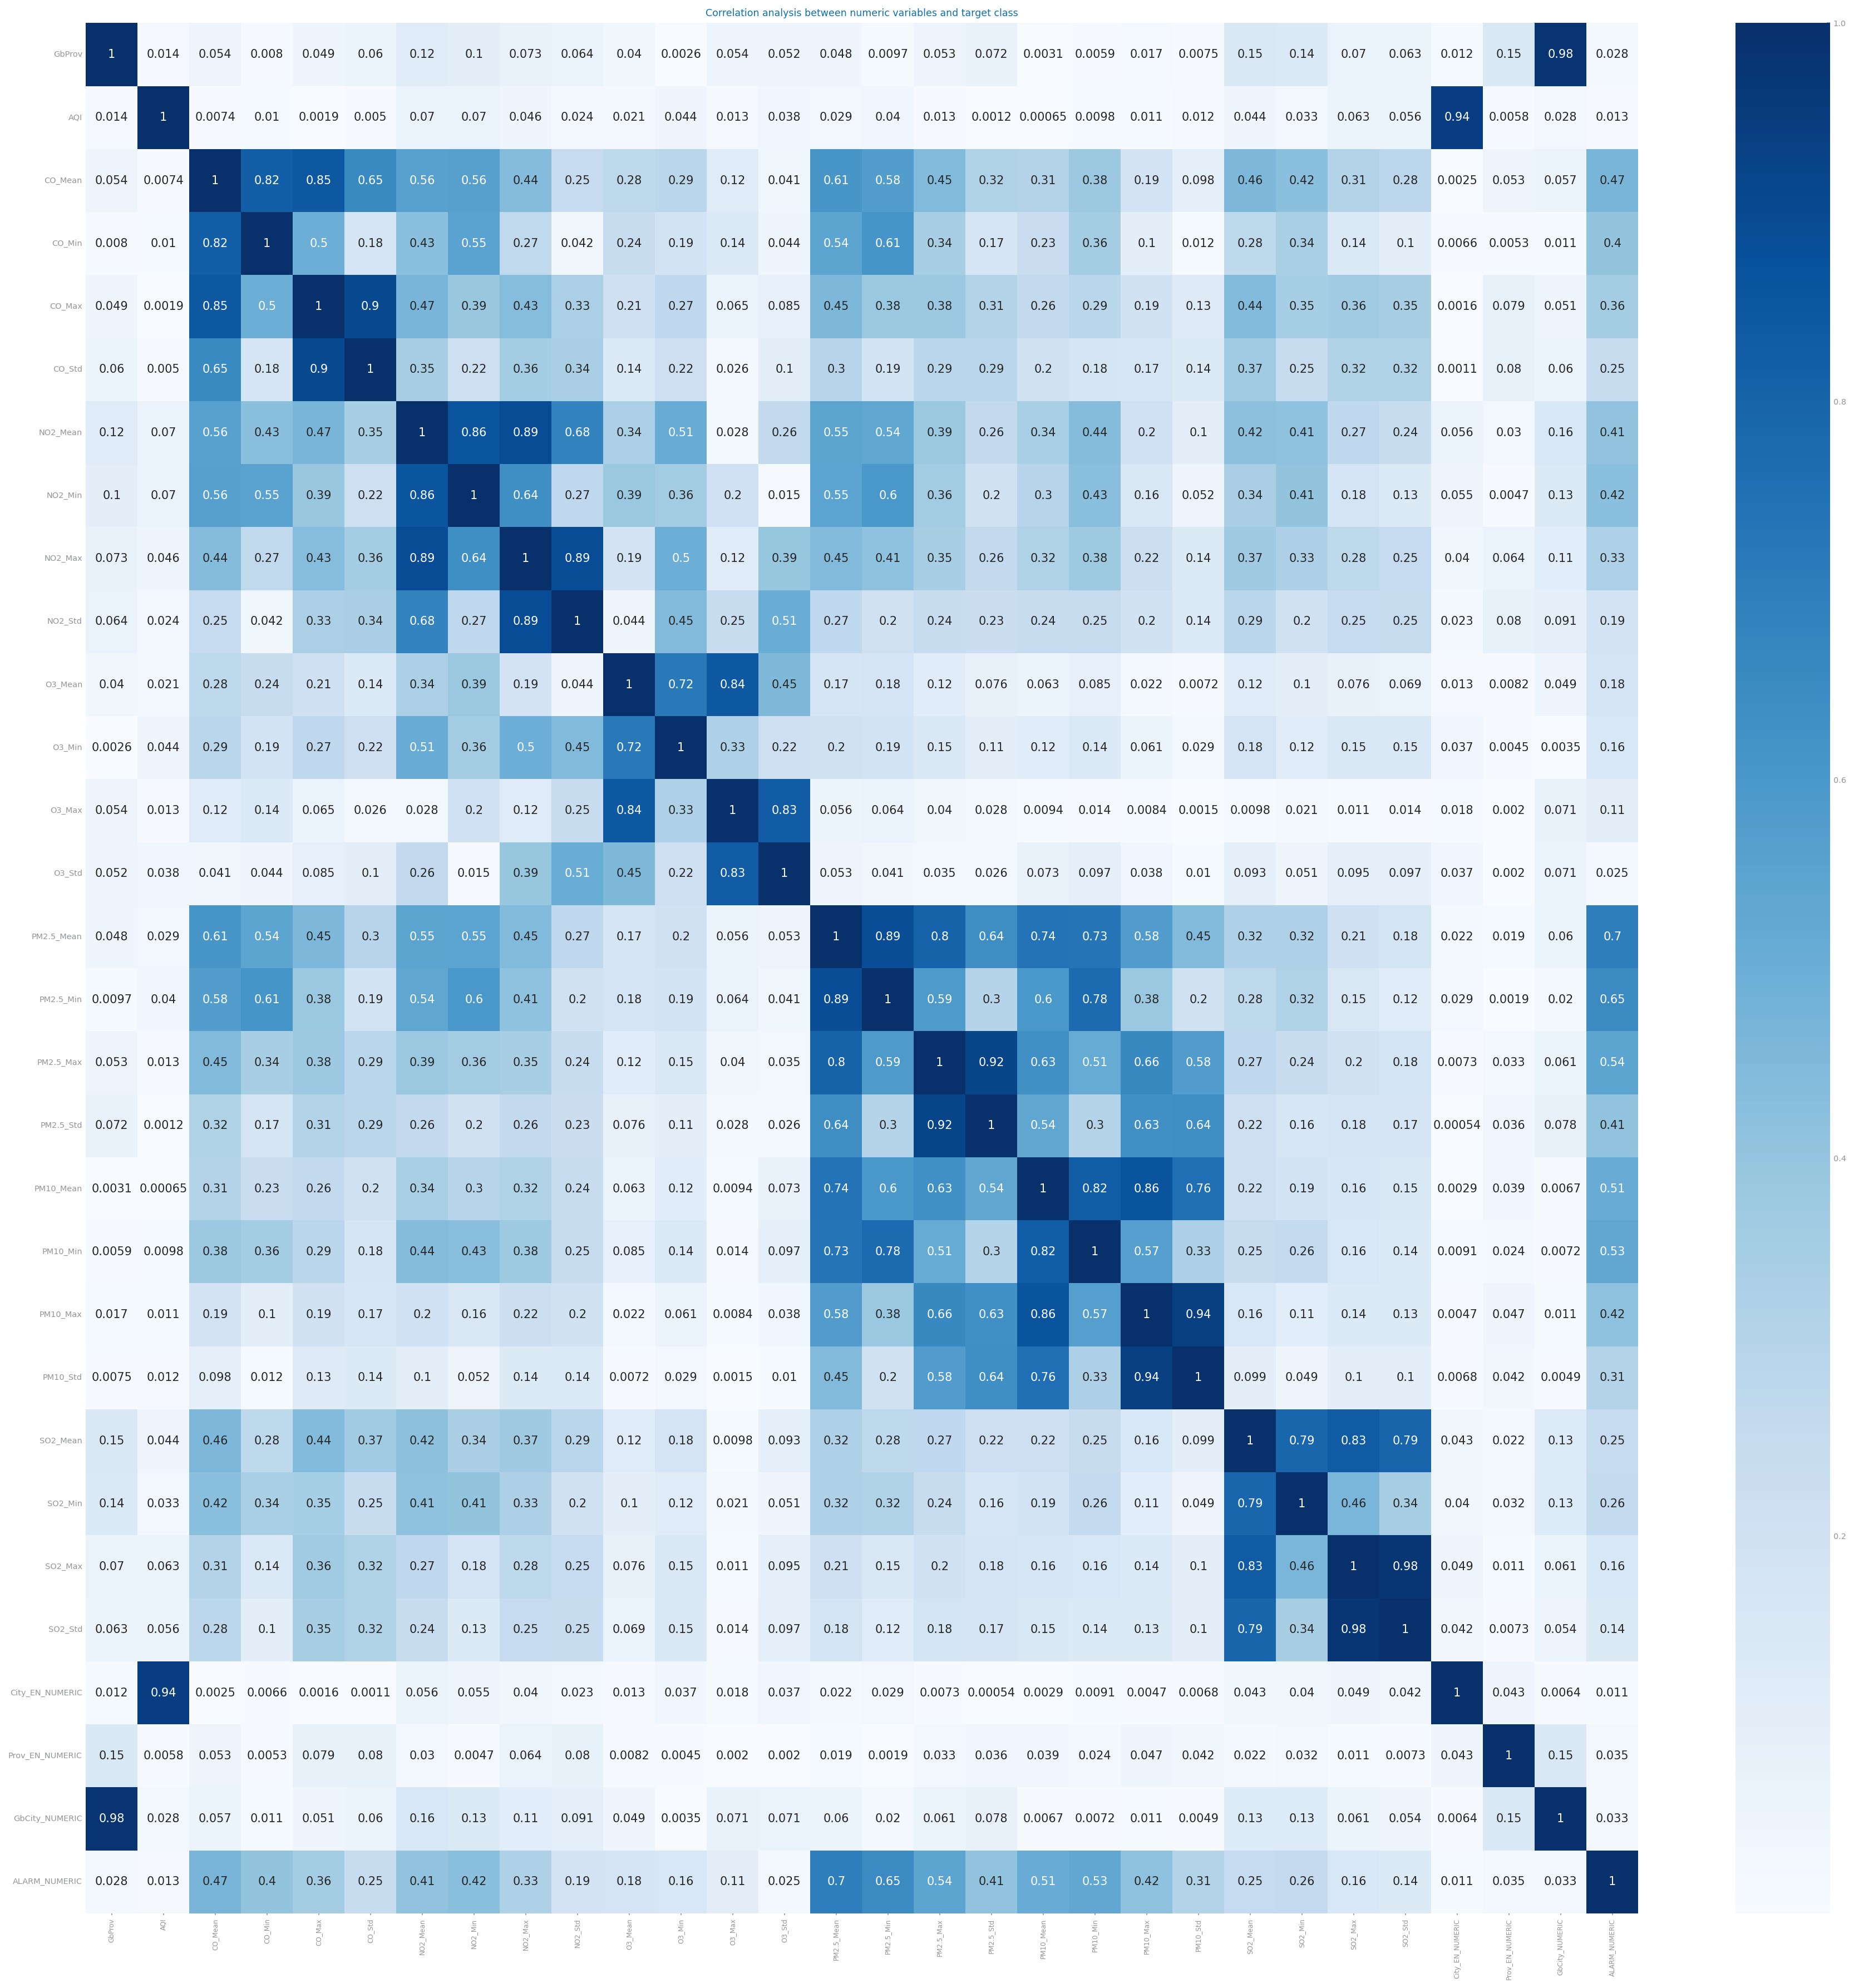

In [72]:
fig = figure(figsize=[30, 30])
heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
title('Correlation analysis between numeric variables and target class')

savefig(SPARCITY_FOLDER + "/correlation_analysis_target.png")

show()